# **QSAR Model Building of dardarin**


# Read in data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
dataset_url = '/content/dardarin_class_pIC50_pubchem_fp-2.csv'
dataset = pd.read_csv(dataset_url)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.879426
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.795880
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.886057
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.107905
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.221849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.050610
1951,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.721246
1952,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.798603
1953,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000


In [3]:
dataset = dataset.fillna(0)

In [4]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1951,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1952,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1953,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
Y = dataset.iloc[:,-1]
Y

0       4.879426
1       7.795880
2       7.886057
3       8.107905
4       8.221849
          ...   
1950    7.050610
1951    7.721246
1952    6.798603
1953    5.000000
1954    5.000000
Name: pIC50, Length: 1955, dtype: float64

# Remove low variance features

In [6]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP12,PubchemFP18,PubchemFP19,PubchemFP23,PubchemFP24,PubchemFP33,PubchemFP143,PubchemFP145,PubchemFP146,...,PubchemFP716,PubchemFP721,PubchemFP734,PubchemFP735,PubchemFP758,PubchemFP779,PubchemFP784,PubchemFP797,PubchemFP798,PubchemFP821
0,0,1,1,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,1
1,1,1,1,1,0,0,0,1,1,1,...,0,0,0,0,1,0,0,0,0,1
2,1,1,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,0,...,1,0,0,1,1,1,0,0,1,1
4,1,1,1,1,0,0,0,0,0,0,...,1,0,0,1,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950,1,1,0,0,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1951,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1952,1,1,1,0,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1953,1,1,0,0,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X.to_csv('descriptor_list.csv', index = False)

In [8]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Random Forest Regression Model

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.8170516319887715

## Model Prediction

In [11]:
Y_pred = model.predict(X)
Y_pred

array([5.65601238, 7.4588488 , 7.69391601, ..., 6.90481409, 6.232523  ,
       6.38640637])

## Model Performance

In [12]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.15
Coefficient of determination (R^2): 0.82


# Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [13]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

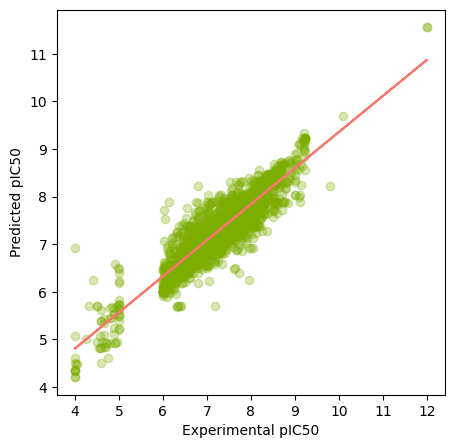

In [14]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

# Save Model as Pickle Object

In [15]:
import pickle

In [16]:
pickle.dump(model, open('dardarin_model.pkl', 'wb'))

In [20]:
# load the model from disk
loaded_model = pickle.load(open('/content/dardarin_model.pkl', 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.8141740289342448
